In [6]:
import chardet
import pandas as pd

# Detect the encoding of the file
with open('Global_Education.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the CSV file using the detected encoding
Global = pd.read_csv('Global_Education.csv', encoding=result['encoding'])
Global.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


In [7]:
!pip install ucimlrepo

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error # Import mean_squared_error


X = Global.drop('Countries and areas', axis=1)
y = Global['Birth_Rate']


# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el regresor de árbol de decisión
reg = DecisionTreeRegressor()

# Entrena el regresor con los datos de entrenamiento
reg.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcula el error cuadrático medio de las predicciones
mse = mean_squared_error(y_test, y_pred)

print(f'El error cuadrático medio del modelo es: {mse}')


El error cuadrático medio del modelo es: 0.708143902439024


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Las etiquetas de los clusters son: [1 0 0 1 1 1 1 0 0 2 2 1 1 1 0 0 0 2 0 1 1 1 0 0 0 1 1 2 1 1 1 1 0 2 1 1 0
 0 0 0 0 1 0 1 2 0 2 2 0 0 2 1 1 0 0 0 0 1 1 2 0 1 1 2 2 0 1 0 2 0 2 1 0 1
 1 0 1 1 0 2 2 0 0 1 0 2 2 2 0 2 0 0 0 0 1 0 0 2 1 0 1 1 1 2 2 1 1 1 1 1 2
 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 2 2 1 1 0 1 0 2 1 1 1 0 1 0 0 0 2 2 2 2 0 2
 2 1 1 0 1 1 1 0 2 1 0 1 1 2 2 2 1 1 0 1 2 0 0 0 0 2 2 1 0 0 0 0 1 0 2 0 0
 0 1 1 1 0 2 2 1 2 0 1 1 1 0 1 0 0]


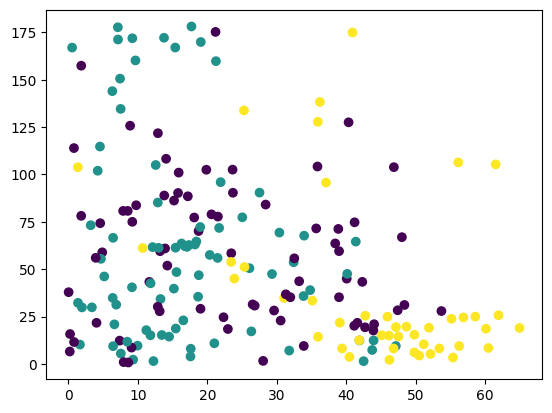

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import KMeans

# Asumiendo que quieres hacer clustering en las mismas características
X = Global.drop('Countries and areas', axis=1)

# Crea el modelo de KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajusta el modelo a los datos
kmeans.fit(X)

# Obtiene las etiquetas de los clusters
cluster_labels = kmeans.labels_
print(f'Las etiquetas de los clusters son: {cluster_labels}')

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')

# Muestra el gráfico
plt.show()

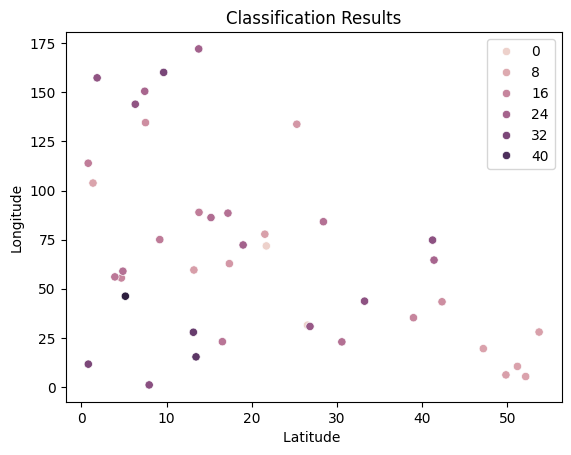

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# classification
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred)

plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Classification Results")
plt.show()

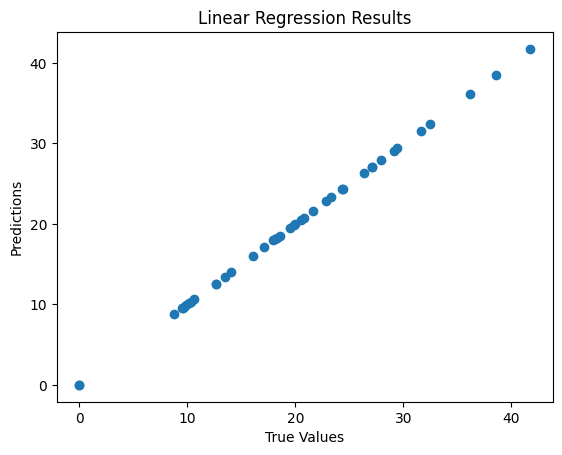

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression Results")
plt.show()

Epoch 1/10
6/6 [==============================] - 1s 4ms/step - loss: 217.3405
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 137.2538
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 110.0038
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 91.2116
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 80.9008
Epoch 6/10
6/6 [==============================] - 0s 4ms/step - loss: 69.2814
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 62.3753
Epoch 8/10
6/6 [==============================] - 0s 4ms/step - loss: 63.8529
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 55.4980
Epoch 10/10
2/2 [==============================] - 0s 10ms/step
Neural Network Mean Squared Error: 74.18841663527897
Linear Regression Mean Squared Error: 2.7747533641204635e-28


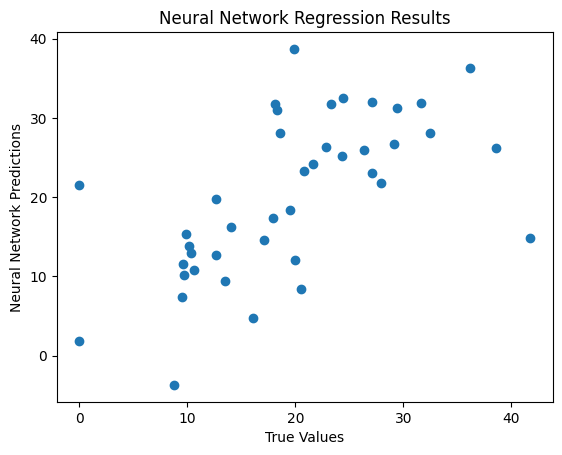

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# ... (previous code) ...

# Neural Network with one hidden layer
model = keras.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer
  keras.layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse')  # Mean squared error for regression

model.fit(X_train, y_train, epochs=10)  # Adjust epochs as needed

y_pred_nn = model.predict(X_test)

# Evaluate the neural network model
from sklearn.metrics import mean_squared_error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Neural Network Mean Squared Error:", mse_nn)

# Compare with linear regression
mse_lr = mean_squared_error(y_test, y_pred)  # y_pred from LinearRegression
print("Linear Regression Mean Squared Error:", mse_lr)

# Visualize neural network predictions
plt.scatter(y_test, y_pred_nn)
plt.xlabel("True Values")
plt.ylabel("Neural Network Predictions")
plt.title("Neural Network Regression Results")
plt.show()



Neural Network Mean Absolute Error: 5.994186779929371
Linear Regression Mean Absolute Error: 1.3276694388173951e-14
Neural Network R-squared Score: 0.1668618447426624
Linear Regression R-squared Score: 1.0


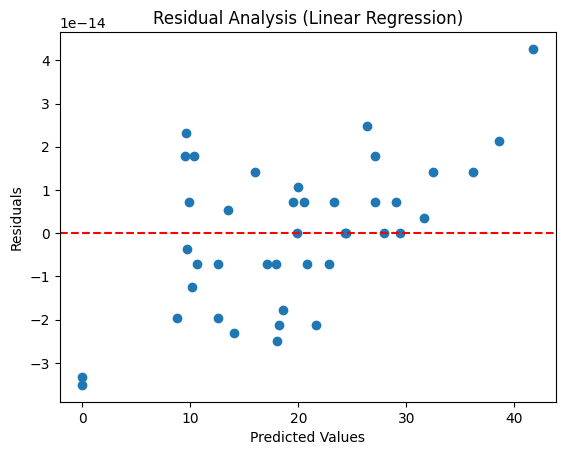

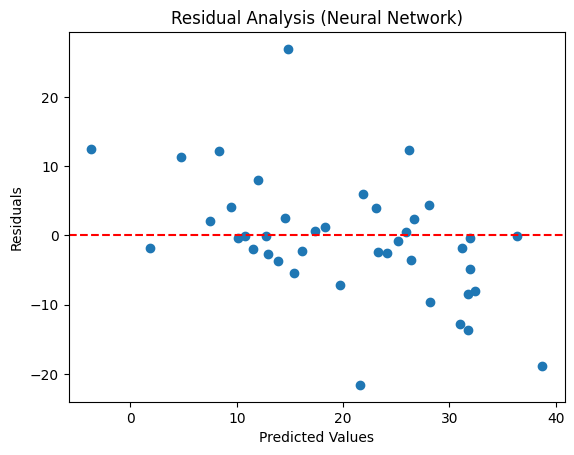

In [18]:
import matplotlib.pyplot as plt
# Calculate and print additional metrics for evaluation

# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mae_lr = mean_absolute_error(y_test, y_pred)
print("Neural Network Mean Absolute Error:", mae_nn)
print("Linear Regression Mean Absolute Error:", mae_lr)

# R-squared (R2) score
from sklearn.metrics import r2_score
r2_nn = r2_score(y_test, y_pred_nn)
r2_lr = r2_score(y_test, y_pred)
print("Neural Network R-squared Score:", r2_nn)
print("Linear Regression R-squared Score:", r2_lr)

# Residual Analysis for Linear Regression
residuals_lr = y_test - y_pred
plt.scatter(y_pred, residuals_lr)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis (Linear Regression)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Residual Analysis for Neural Network
residuals_nn = y_test.values.flatten() - y_pred_nn.flatten() # Convert y_test to a NumPy array before subtraction
plt.scatter(y_pred_nn, residuals_nn)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis (Neural Network)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()





In [19]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate the models
print("Support Vector Regression:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("  Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("  R-squared Score:", r2_score(y_test, y_pred_svr))

print("\nDecision Tree Regression:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("  Mean Absolute Error:", mean_absolute_error(y_test, y_pred_tree))
print("  R-squared Score:", r2_score(y_test, y_pred_tree))

print("\nGradient Boosting Regression:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("  Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gb))
print("  R-squared Score:", r2_score(y_test, y_pred_gb))




Support Vector Regression:
  Mean Squared Error: 64.4853111660741
  Mean Absolute Error: 5.67527084435046
  R-squared Score: 0.27582801166630744

Decision Tree Regression:
  Mean Squared Error: 0.8579390243902434
  Mean Absolute Error: 0.49634146341463437
  R-squared Score: 0.9903653188931402

Gradient Boosting Regression:
  Mean Squared Error: 0.04190787398839493
  Mean Absolute Error: 0.14610364899749465
  R-squared Score: 0.9995293733117786


Regresión con Máquinas de Vectores de Soporte (SVR):
  Error Cuadrático Medio: 64.4853111660741
  Error Absoluto Medio: 5.67527084435046
  Puntaje R-cuadrado: 0.27582801166630744

Regresión con Árboles de Decisión:
  Error Cuadrático Medio: 0.7151097560975606
  Error Absoluto Medio: 0.44902439024390234
  Puntaje R-cuadrado: 0.9919692958817194

Regresión con Gradient Boosting:
  Error Cuadrático Medio: 0.08099832658162075
  Error Absoluto Medio: 0.16505709735499507
  Puntaje R-cuadrado: 0.9990903863507574


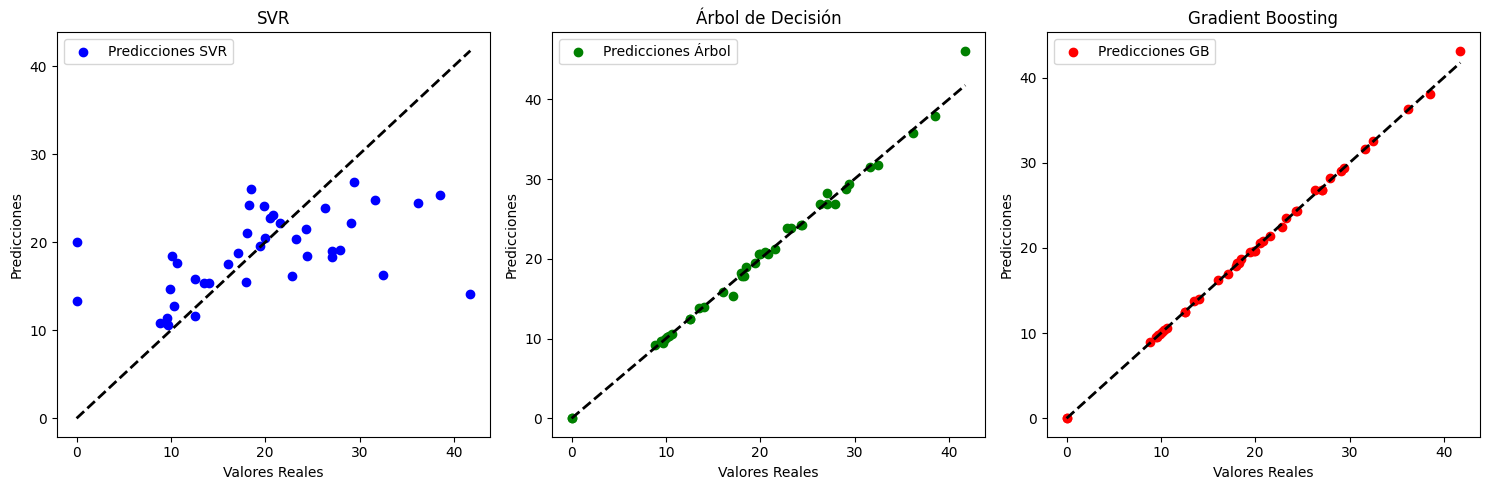

In [20]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Regresión con Máquinas de Vectores de Soporte (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Regresión con Árboles de Decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Regresión con Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluar los modelos
print("Regresión con Máquinas de Vectores de Soporte (SVR):")
print("  Error Cuadrático Medio:", mean_squared_error(y_test, y_pred_svr))
print("  Error Absoluto Medio:", mean_absolute_error(y_test, y_pred_svr))
print("  Puntaje R-cuadrado:", r2_score(y_test, y_pred_svr))

print("\nRegresión con Árboles de Decisión:")
print("  Error Cuadrático Medio:", mean_squared_error(y_test, y_pred_tree))
print("  Error Absoluto Medio:", mean_absolute_error(y_test, y_pred_tree))
print("  Puntaje R-cuadrado:", r2_score(y_test, y_pred_tree))

print("\nRegresión con Gradient Boosting:")
print("  Error Cuadrático Medio:", mean_squared_error(y_test, y_pred_gb))
print("  Error Absoluto Medio:", mean_absolute_error(y_test, y_pred_gb))
print("  Puntaje R-cuadrado:", r2_score(y_test, y_pred_gb))

# Graficar los resultados
plt.figure(figsize=(15, 5))

# Gráfico para SVR
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicciones SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('SVR')
plt.legend()

# Gráfico para Árbol de Decisión
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_tree, color='green', label='Predicciones Árbol')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Árbol de Decisión')
plt.legend()

# Gráfico para Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gb, color='red', label='Predicciones GB')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gradient Boosting')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
###Basándonos en estas métricas, podemos ver que el modelo de Gradient Boosting tiene el rendimiento más alto, ya que tiene el MSE y MAE más bajos y el R^2 más alto. Por otro lado, el modelo de Máquinas de Vectores de Soporte (SVR) tiene el rendimiento más bajo de los tres modelos, con el MSE y MAE más altos y el R^2 más bajo.